In [18]:
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [ ]:
#Trial for one movie

my_api_key = '86a95444'

movie =  'Edward Scissorhands'

movie_url = f'http://www.omdbapi.com/?apikey={my_api_key}&t={movie}'
movie_url   
response = requests.get(movie_url).json()
response

In [3]:
#Import the original data
movies_df = pd.read_csv('movie_profit.csv')
movies_df


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,actor
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy,Steve Carell
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action,Kevin Costner
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure,Charlie Hunnam
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action,Keanu Reeves
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,Chris Pratt
...,...,...,...,...,...,...,...,...,...,...
3396,3397,10/28/2011,Like Crazy,250000.0,3395391.0,3.728400e+06,Paramount Pictures,PG-13,Drama,Movie not Found
3397,3398,7/14/2000,Chuck&Buck,250000.0,1055671.0,1.157672e+06,Artisan,R,Drama,Movie not Found
3398,3399,3/28/1997,Love and Other Catastrophes,250000.0,212285.0,7.432160e+05,Fox Searchlight,R,Comedy,Movie not Found
3399,3400,8/28/1998,I Married a Strange Person,250000.0,203134.0,2.031340e+05,Lionsgate,NaN,Comedy,Movie not Found


In [4]:
#Create the list of movies to check
movie_list =  movies_df['movie']
len(movie_list)


3401

In [9]:
#Create empty lists for the data to store
resultados=[]

url_list=[]

#Create the list of apykeys to ise
#necesitamos 35 apikeys para hacer 3401 request por cada película 
api_keys = ['42777bba','23541de1','af8eeea0','d1411885']
key_index = 0
request_count = 0


#The loop to make the requests from the apikey
for movie in movie_list:
 #take the api key from the list according to the key_index value
    my_api_key= api_keys[key_index]
    movie_url = f'http://www.omdbapi.com/?apikey={my_api_key}&t={movie}'
    
    url_list.append(movie_url)

    #print(f'Getting {movie} info')

    #make the request & store the information in the lists
    response = requests.get(movie_url).json()

    try:
        pelicula = {
            'Title':movie,
            'Director': response['Director'],
            'Writer':response['Writer'],
            'Actors':response['Actors'],
            'Runtime':response['Runtime'],
            'Language':response['Language'],
            'Country':response['Country'],
            'Awards': response['Awards'],
            'Poster': response['Poster'],
            'Metascore': response['Metascore'],
            'imdbRating':response['imdbRating'],
            'imdbVotes':response['imdbVotes'],
            'BoxOffice':response['BoxOffice']
        }
        resultados.append(pelicula)
    except:
        pelicula = {
            'Title':movie,
            'Director': 'Movie not found',
            'Writer':'Movie not found',
            'Actors':'Movie not found',
            'Runtime':'Movie not found',
            'Language':'Movie not found',
            'Country':'Movie not found',
            'Awards': 'Movie not found',
            'Poster': 'Movie not found',
            'Metascore': 'Movie not found',
            'imdbRating':'Movie not found',
            'imdbVotes':'Movie not found',
            'BoxOffice':'Movie not found'
            }
        resultados.append(pelicula)
    
 #add 1 to the request count   
    print(pelicula)  
    request_count += 1
    
    #when it hits the iteration 990 change to the next apykey and reset the count
    if request_count >= 990:
            key_index += 1
            request_count = 0






{'Title': 'Evan Almighty', 'Director': 'Tom Shadyac', 'Writer': 'Steve Oedekerk, Joel Cohen, Alec Sokolow', 'Actors': 'Steve Carell, Morgan Freeman, Lauren Graham', 'Runtime': '96 min', 'Language': 'English', 'Country': 'United States', 'Awards': '2 wins & 11 nominations', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTUxMTEzODYxMV5BMl5BanBnXkFtZTcwNzQ4ODU0MQ@@._V1_SX300.jpg', 'Metascore': '37', 'imdbRating': '5.4', 'imdbVotes': '152,796', 'BoxOffice': '$100,462,298'}
{'Title': 'Waterworld', 'Director': 'Kevin Reynolds', 'Writer': 'Peter Rader, David Twohy', 'Actors': 'Kevin Costner, Jeanne Tripplehorn, Dennis Hopper', 'Runtime': '177 min', 'Language': 'English', 'Country': 'United States', 'Awards': 'Nominated for 1 Oscar. 6 wins & 9 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BYzE4NTRmMDYtNWYzYi00YmNkLTk4NDEtYjFmMDc4ODQ3ODY2XkEyXkFqcGdeQXVyNTUyMzE4Mzg@._V1_SX300.jpg', 'Metascore': '56', 'imdbRating': '6.3', 'imdbVotes': '205,371', 'BoxOffice': '$88,246

In [ ]:
#store the lists in the data frame
movies_df['Runtime'] = runtime
movies_df['Director'] = director
movies_df['Writer'] = writer
movies_df['Actors'] = actors
movies_df['Language'] = language
movies_df['Country'] = country
movies_df['Awards'] = awards
movies_df['Poster'] = poster
movies_df['Metascore'] = metascore
movies_df['imdbRating'] = imdbRating
movies_df['imdbVotes'] = imdbVotes
movies_df['BoxOffice'] = boxOffice

In [10]:
len(url_list)

3401

In [ ]:
movies_df_try = pd.DataFrame()

movies_df_try['Runtime'] = runtime
movies_df_try['Director'] = director
movies_df_try['Writer'] = writer
movies_df_try['Actors'] = actors
movies_df_try['Language'] = language
movies_df_try['Country'] = country
movies_df_try['Awards'] = awards
movies_df_try['Poster'] = poster
movies_df_try['Metascore'] = metascore
movies_df_try['imdbRating'] = imdbRating
movies_df_try['imdbVotes'] = imdbVotes
#movies_df_try['BoxOffice'] = boxOffice

In [ ]:
movies_df_try.to_excel("Prueba.xlsx")

In [ ]:
print(len(runtime))
print(len(director))
print(len(writer))
print(len(actors))
print(len(language))
print(len(country))
print(len(awards))
print(len(poster))
print(len(metascore))
print(len(imdbRating))
print(len(imdbVotes))
print(len(boxOffice))

In [ ]:
len(actors)


In [ ]:
len([1,2,3,[4,5,6]])

In [10]:
resultados

[{'Title': 'Evan Almighty',
  'Director': 'Tom Shadyac',
  'Writer': 'Steve Oedekerk, Joel Cohen, Alec Sokolow',
  'Actors': 'Steve Carell, Morgan Freeman, Lauren Graham',
  'Runtime': '96 min',
  'Language': 'English',
  'Country': 'United States',
  'Awards': '2 wins & 11 nominations',
  'Poster': 'https://m.media-amazon.com/images/M/MV5BMTUxMTEzODYxMV5BMl5BanBnXkFtZTcwNzQ4ODU0MQ@@._V1_SX300.jpg',
  'Metascore': '37',
  'imdbRating': '5.4',
  'imdbVotes': '152,796',
  'BoxOffice': '$100,462,298'},
 {'Title': 'Waterworld',
  'Director': 'Kevin Reynolds',
  'Writer': 'Peter Rader, David Twohy',
  'Actors': 'Kevin Costner, Jeanne Tripplehorn, Dennis Hopper',
  'Runtime': '177 min',
  'Language': 'English',
  'Country': 'United States',
  'Awards': 'Nominated for 1 Oscar. 6 wins & 9 nominations total',
  'Poster': 'https://m.media-amazon.com/images/M/MV5BYzE4NTRmMDYtNWYzYi00YmNkLTk4NDEtYjFmMDc4ODQ3ODY2XkEyXkFqcGdeQXVyNTUyMzE4Mzg@._V1_SX300.jpg',
  'Metascore': '56',
  'imdbRating': '6.3'

In [12]:
results = pd.DataFrame(resultados)



In [13]:
results['Actors'].value_counts()

Movie not found                                       184
N/A                                                     8
William Shatner, Leonard Nimoy, DeForest Kelley         5
Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss      3
Patrick Stewart, Jonathan Frakes, Brent Spiner          3
                                                     ... 
Chad Michael Murray, Paris Hilton, Elisha Cuthbert      1
Shailene Woodley, Sam Claflin, Jeffrey Thomas           1
Kiefer Sutherland, Paula Patton, Amy Smart              1
Aaliyah, Stuart Townsend, Marguerite Moreau             1
Rea Lest, Jörgen Liik, Arvo Kukumägi                    1
Name: Actors, Length: 3176, dtype: int64

In [14]:
movies_df_complete = movies_df.rename(columns={'movie':'Title'})

In [16]:
movies_df_complete = movies_df_complete.merge(results , on='Title')

In [21]:
movies_df_complete['Title'].value_counts()
#movies_df['movie'].value_counts()

Tau ming chong                   4
Evan Almighty                    1
Top Five                         1
Philomena                        1
Time Bandits                     1
                                ..
Adrift                           1
Mirrors                          1
Queen of the Damned              1
Nanny McPhee and the Big Bang    1
November                         1
Name: Title, Length: 3400, dtype: int64

In [22]:
movies_df_complete.to_csv('Movies_Complete.csv')

In [3]:
movies_df_complete = pd.read_csv('Movies_Complete.csv')
movies_df_complete.head()

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Actors,Runtime,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,"Steve Carell, Morgan Freeman, Lauren Graham",96 min,English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298"
1,1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,"Kevin Costner, Jeanne Tripplehorn, Dennis Hopper",177 min,English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220"
2,2,3,5/12/2017,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure,...,"Charlie Hunnam, Astrid Bergès-Frisbey, Jude Law",126 min,English,"United Kingdom, United States, Australia",10 nominations,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066"
3,3,4,12/25/2013,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action,...,"Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki",128 min,"English, Japanese","United States, United Kingdom, Japan, Hungary",5 nominations,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475"
4,4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action,...,"Chris Pratt, Bryce Dallas Howard, Rafe Spall",128 min,"English, Russian","United States, China",4 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760"


In [4]:
movies_df_complete['Revenue'] = movies_df_complete['worldwide_gross']-movies_df_complete['production_budget']

movies_df_complete['%_Revenue'] = (movies_df_complete['Revenue']/movies_df_complete['production_budget'])*100

movies_df_complete.head(2)

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298",-868671,-0.496383
1,1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220",89246220,50.997840


## Analysis of genres

In [28]:
movies_df_complete[movies_df_complete['production_budget']<=0]

,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue


<Axes: >

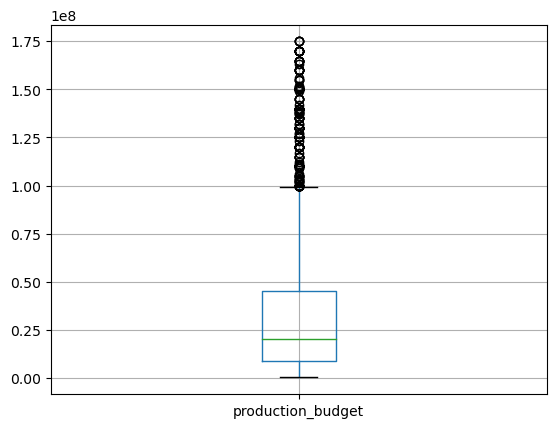

In [29]:
movies_df_complete.boxplot(column='production_budget')

In [32]:
movies_df_complete[['production_budget']].describe()

,production_budget
count,3.400000e+03
mean,3.329336e+07
std,3.489391e+07
min,2.500000e+05
25%,9.000000e+06
50%,2.000000e+07
75%,4.500000e+07
max,1.750000e+08


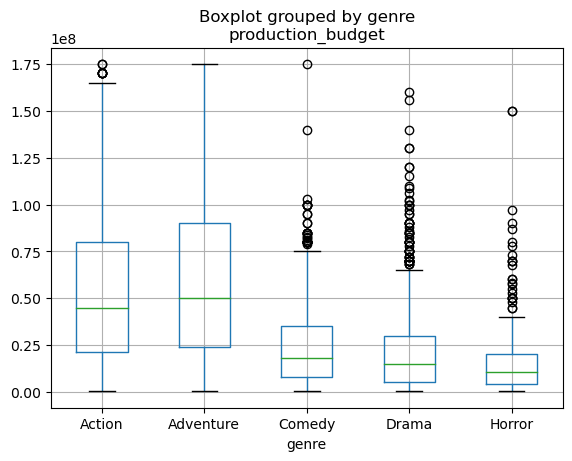

In [38]:
movies_df_complete.boxplot(column='production_budget', by='genre')
plt.show()

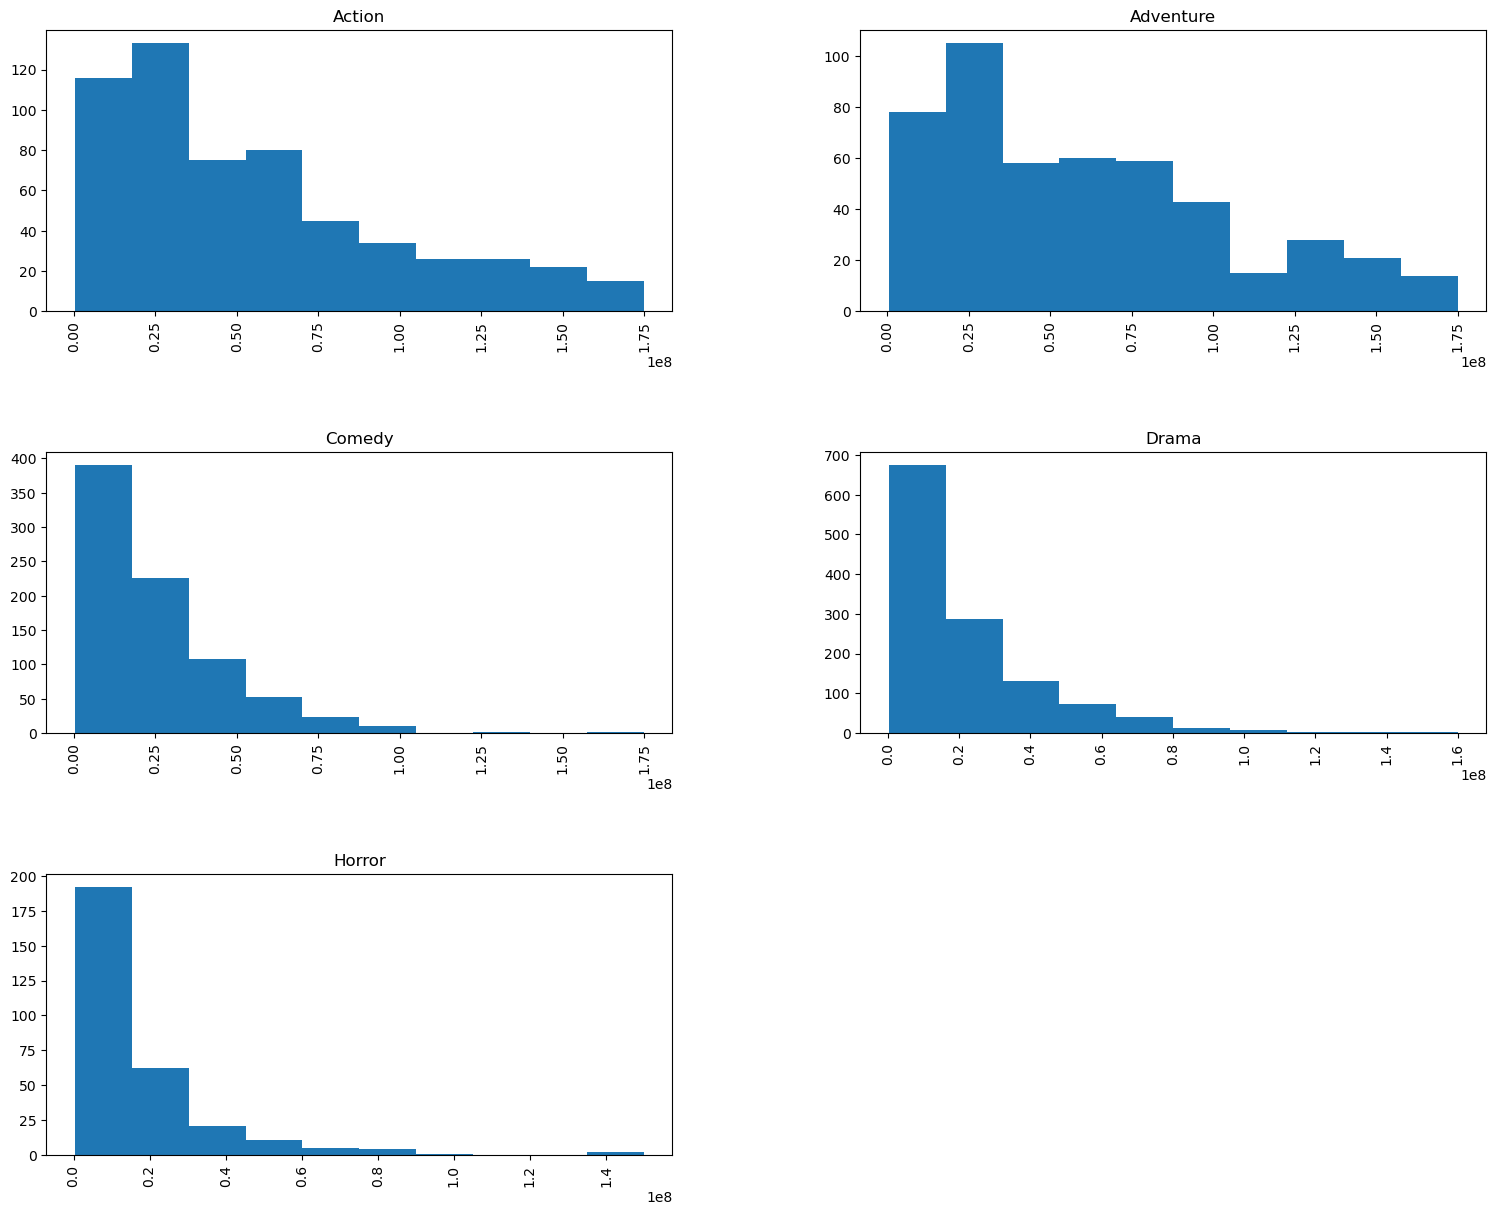

In [63]:
hist = movies_df_complete.hist(column='production_budget', by='genre',figsize=(18,15))


plt.show()

In [37]:
movies_df_complete.groupby('genre')['production_budget'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,572.0,5.596126e+07,4.374472e+07,250000.0,21000000.0,44500000.0,80000000.0,175000000.0
Adventure,481.0,6.111168e+07,4.400179e+07,400000.0,24000000.0,50000000.0,90000000.0,175000000.0
Comedy,813.0,2.428935e+07,2.218251e+07,250000.0,8000000.0,18000000.0,35000000.0,175000000.0
Drama,1236.0,2.177412e+07,2.237231e+07,250000.0,5500000.0,15000000.0,30000000.0,160000000.0
Horror,298.0,1.722417e+07,2.058424e+07,325000.0,4275000.0,10750000.0,20000000.0,150000000.0


<Axes: >

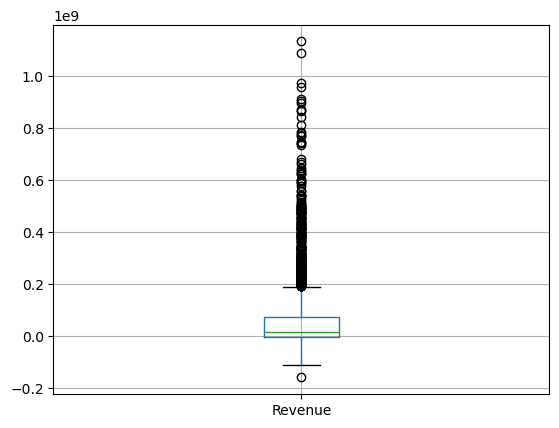

In [39]:
movies_df_complete.boxplot(column='Revenue')

In [40]:
movies_df_complete[['Revenue']].describe()

,Revenue
count,3.400000e+03
mean,6.083800e+07
std,1.209519e+08
min,-1.600000e+08
25%,-2.285685e+06
50%,1.600435e+07
75%,7.485635e+07
max,1.134866e+09


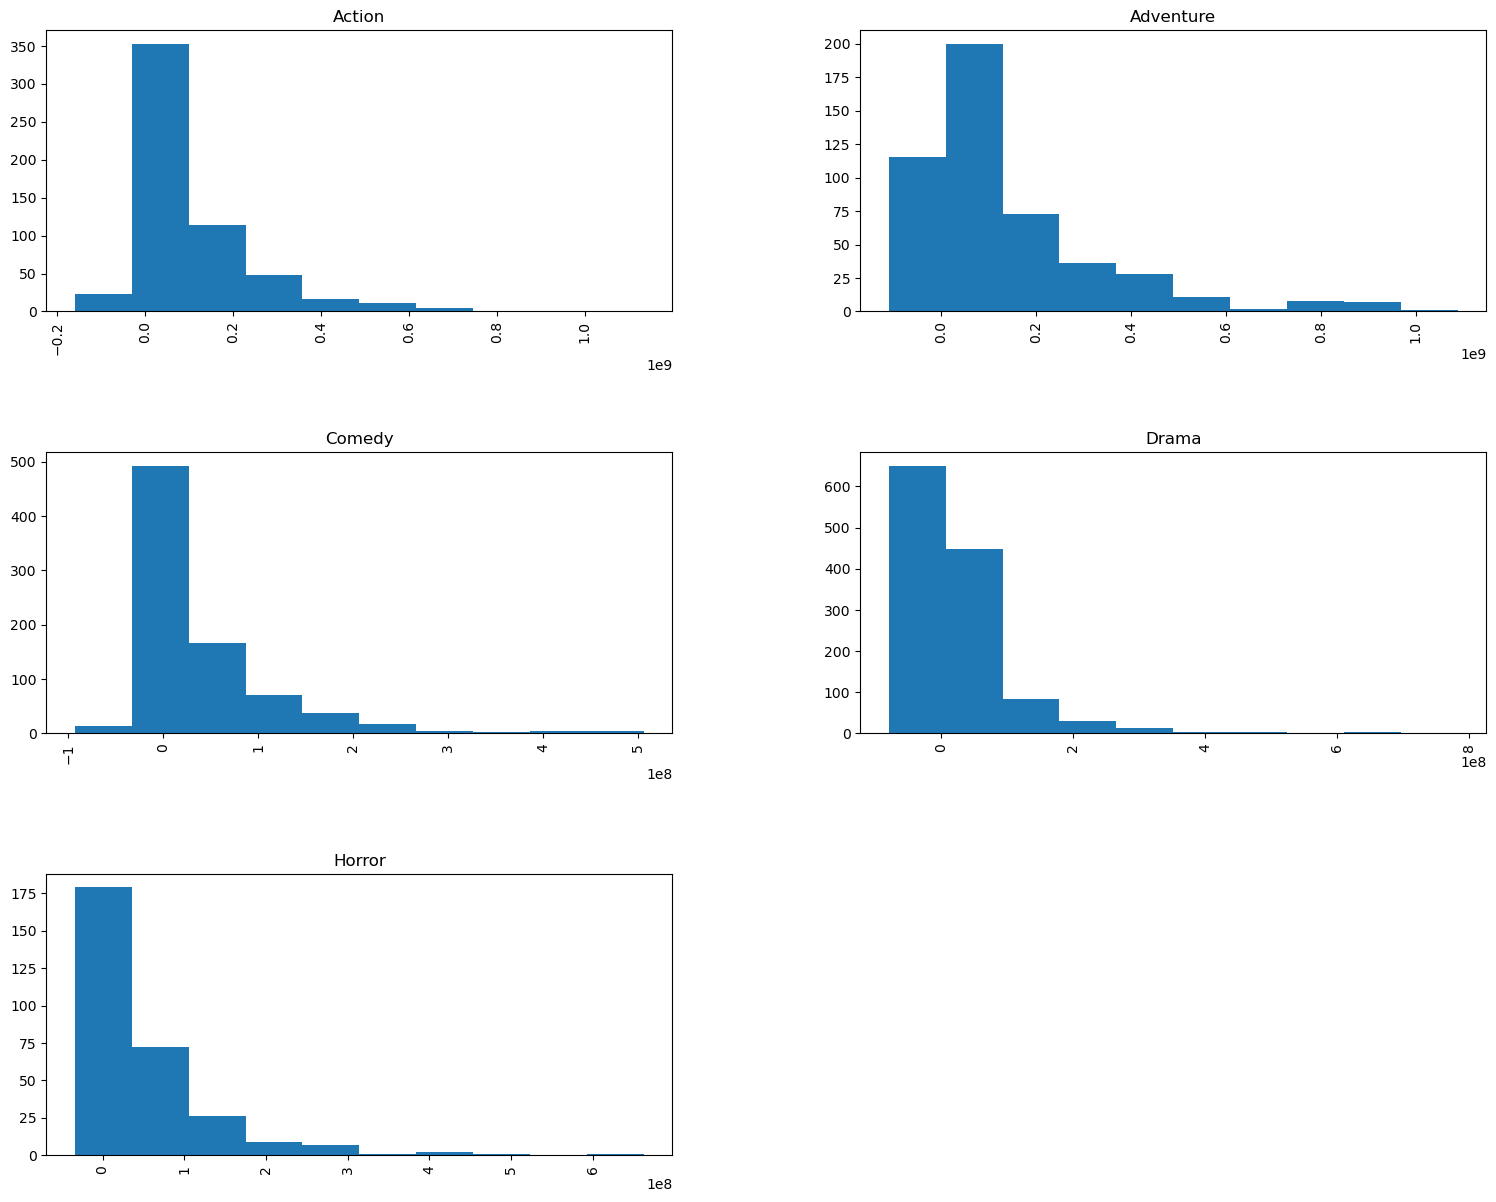

In [41]:
movies_df_complete.hist(column='Revenue', by='genre',figsize=(18,15))
plt.show()

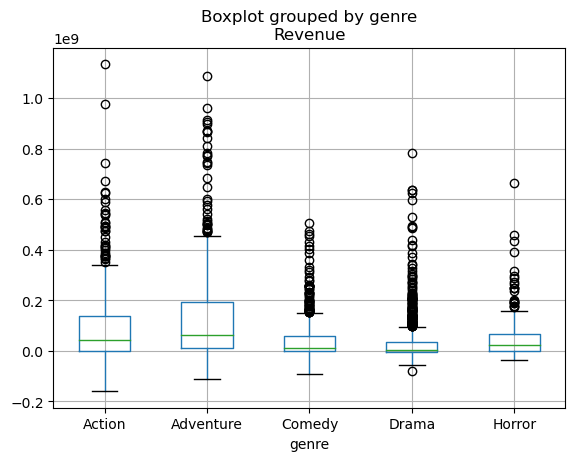

In [42]:
movies_df_complete.boxplot(column='Revenue', by='genre')
plt.show()

In [43]:
movies_df_complete.groupby('genre')['Revenue'].describe()

#Checar el ANOVA

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,572.0,9.312746e+07,1.449035e+08,-160000000.0,-1631747.75,42348609.0,1.367105e+08,1.134866e+09
Adventure,481.0,1.388172e+08,1.967909e+08,-110450242.0,12000000.00,64717124.0,1.938152e+08,1.088782e+09
Comedy,813.0,4.063182e+07,7.541858e+07,-92905005.0,-1964688.00,11934477.0,5.956970e+07,5.064643e+08
Drama,1236.0,3.144804e+07,7.817714e+07,-79448583.0,-4252492.75,4583444.0,3.675590e+07,7.824653e+08
Horror,298.0,5.001943e+07,8.257008e+07,-34042459.0,263357.50,22346376.0,6.802600e+07,6.624592e+08


<Axes: xlabel='production_budget', ylabel='Revenue'>

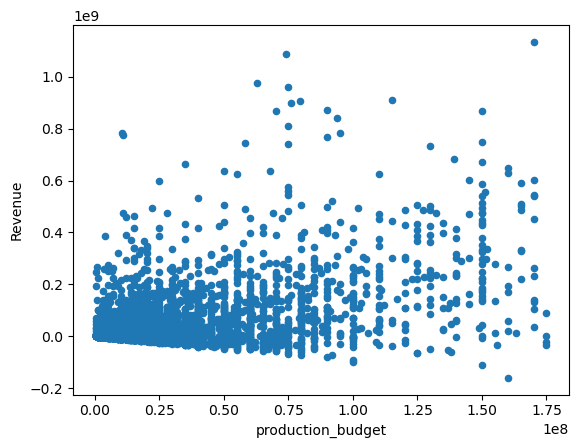

In [45]:
movies_df_complete.plot.scatter(x='production_budget', y='Revenue')

genre
Action       Axes(0.125,0.11;0.775x0.77)
Adventure    Axes(0.125,0.11;0.775x0.77)
Comedy       Axes(0.125,0.11;0.775x0.77)
Drama        Axes(0.125,0.11;0.775x0.77)
Horror       Axes(0.125,0.11;0.775x0.77)
dtype: object

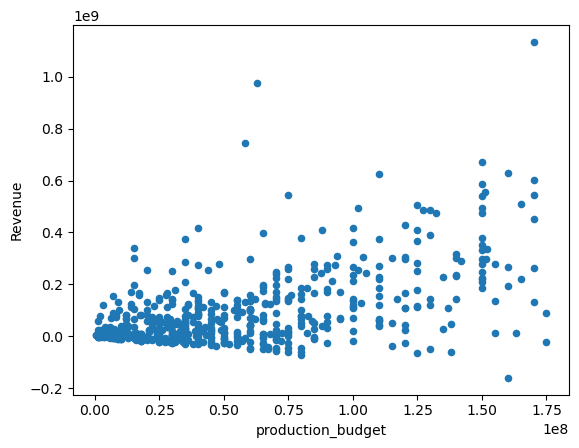

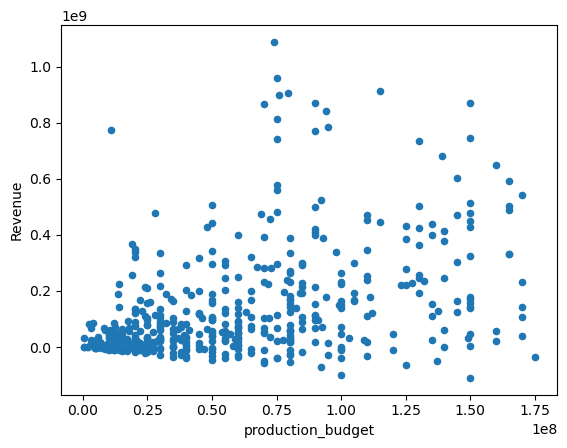

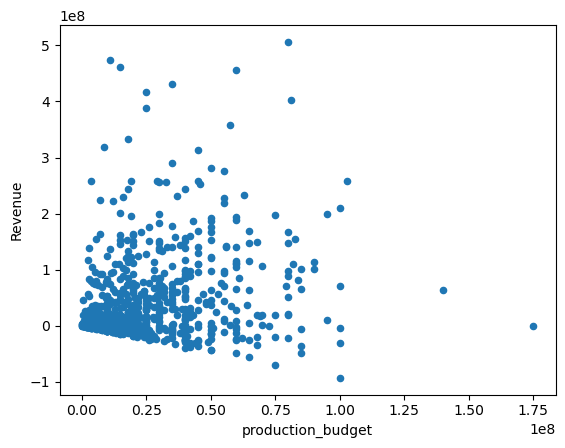

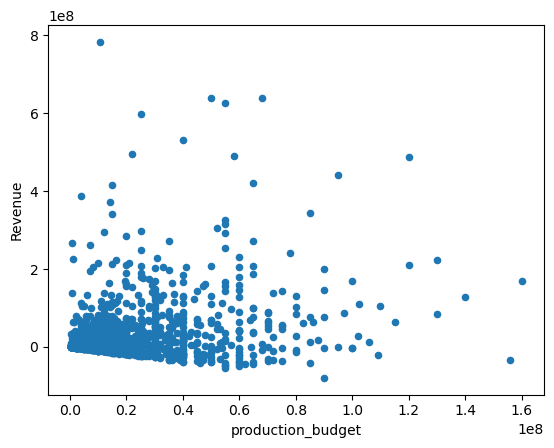

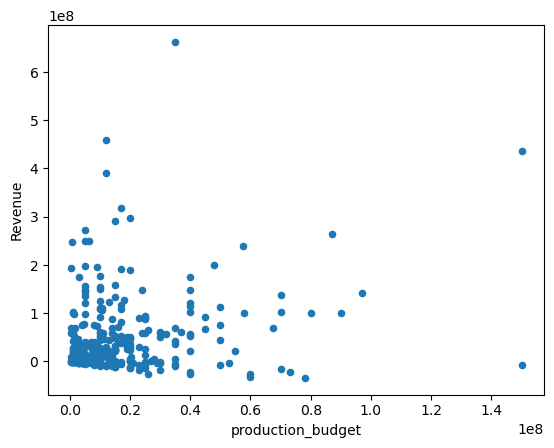

In [52]:
movies_df_complete.groupby('genre').plot.scatter(x='production_budget',y='Revenue')

In [66]:
movies_df_complete['release_date'] = pd.to_datetime(movies_df_complete['release_date'])
movies_df_complete['Year'] = movies_df_complete['release_date'].dt.year

In [ ]:
sample_df['Actors'].str.split(',')
sample_df['Actors List'] = sample_df['Actors'].str.split(',')

sample_df.head()